# 1. Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df_ticket = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\ticket_history.csv')
df_customer = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\customer.csv')
df_campaign = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\campaign.csv')
df_status = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\status_detail.csv')
df_device = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\device_detail.csv')

# 2. Data cleaning

## 2.1 Data type, Null values, Unique values and Duplicate values

In [3]:
# Definition

#Kiểm tra giá trị unique và null
def unique_null(df):
    object_columns = df.columns

    print(f"{'Column':30} | {'Unique':>6} | {'Non-null':>8} | {'Nulls':>6} | {'% Non-null':>10}")
    print("-" * 80)

    for col in object_columns:
        unique_vals = df[col].nunique(dropna=True)
        non_nulls = df[col].notnull().sum()
        nulls = df[col].isnull().sum()
        pct = round(non_nulls / len(df) * 100, 2)

        print(f"{col[:30]:30} | {unique_vals:6} | {non_nulls:8} | {nulls:6} | {pct:10.2f}%")

#Kiểm tra giá trị specific trong các cột
def specific_cols(df, col):
    for column in col:
        print("-" * 100)
        print(f"*, Column: {column}")
        print(df[column].value_counts(dropna=False))  # Include NaNs if any
        print("-" * 100)


In [4]:
#Data type, NULL values, duplicate values

#df_device
df_device.head()
df_device.info()
unique_null(df_device)
specific_cols(df_device, ['platform'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB
Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
device_number                  | 139901 |   139901 |      1 |     100.00%
model                          |   1260 |   132763 |   7139 |      94.90%
platform                       |      2 |   139902 |      0 |     100.00%
----------------------------------------------------------------------------------------------------
*, Column: platform
platform
mobile     123088
website     16814
Name: count, dtype: int64
--------------------------------------------------------------

In [5]:
df_device = df_device.fillna('unknown')
unique_null(df_device)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
device_number                  | 139902 |   139902 |      0 |     100.00%
model                          |   1261 |   139902 |      0 |     100.00%
platform                       |      2 |   139902 |      0 |     100.00%


In [6]:
df_status

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,customer
5,-5,Payment failed from bank,external
6,-6,Need verify your account to continue,customer
7,-7,Transaction temporarily limited,internal


In [7]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [8]:
unique_null(df_status)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
status_id                      |      8 |        8 |      0 |     100.00%
description                    |      8 |        8 |      0 |     100.00%
error_group                    |      3 |        7 |      1 |      87.50%


In [9]:
df_status[df_status['error_group'].isnull()]

,status_id,description,error_group
0,1,Order successful,NaN


In [10]:
specific_cols(df_status,['error_group'])

----------------------------------------------------------------------------------------------------
*, Column: error_group
error_group
customer    4
external    2
NaN         1
internal    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [11]:
df_campaign.head()

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [12]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [13]:
unique_null(df_campaign)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
campaign_id                    |    216 |      216 |      0 |     100.00%
campaign_type                  |      3 |      216 |      0 |     100.00%


In [14]:
specific_cols(df_campaign,['campaign_type'])

----------------------------------------------------------------------------------------------------
*, Column: campaign_type
campaign_type
voucher            142
direct discount     72
reward point         2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [15]:
df_customer.head(5)

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [16]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [17]:
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [18]:
unique_null(df_customer)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
customer_id                    | 131400 |   131400 |      0 |     100.00%
usergender                     |      3 |   131400 |      0 |     100.00%
dob                            |  11640 |   131400 |      0 |     100.00%


In [19]:
df_ticket.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [20]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [21]:
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [22]:
unique_null(df_ticket)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
ticket_id                      | 154725 |   154827 |      0 |     100.00%
customer_id                    | 119477 |   154827 |      0 |     100.00%
paying_method                  |      5 |   154827 |      0 |     100.00%
theater_name                   |    179 |   154827 |      0 |     100.00%
device_number                  | 126459 |   154827 |      0 |     100.00%
original_price                 |   1895 |   154827 |      0 |     100.00%
discount_value                 |    242 |   154827 |      0 |     100.00%
final_price                    |   2715 |   154827 |      0 |     100.00%
time                           | 154725 |   154827 |      0 |     100.00%
status_id                      |      8 |   154827 |      0 |     100.00%
campaign_id                    |    211 |   154827 |      0 |     100.00%
movie_name                     |

In [23]:
154827-154725

102

In [24]:
df_ticket[df_ticket.duplicated(keep= False)]

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
...,...,...,...,...,...,...,...,...,...,...,...,...
150907,19157b98a57ed878fb487d8513c5990b,208867,bank account,109.0,52933d84749f4b41e9b3458f373e7022,5.36,2.52,2.84,2022-04-12 15:53:18.845,1,73240,Jujutsu Kaisen 0
150908,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150909,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150910,ee8873f48b7a45d5a979f0b425a95838,224834,money in app,119.0,957be8a5460e76997e6802bccd969511,20.62,4.62,16.00,2022-05-07 07:22:33.411,1,73240,Jujutsu Kaisen 0


In [25]:
df_ticket.drop_duplicates(inplace= True)

## 2.2 Join tables

In [26]:
join_customer = pd.merge(df_ticket, df_customer, how= 'left', on = 'customer_id')
join_device = pd.merge(join_customer, df_device, how= 'left', on = 'device_number')
join_campaign = pd.merge(join_device, df_campaign, how= 'left', on = 'campaign_id')
join_all = pd.merge(join_campaign, df_status, how= 'left', on = 'status_id')

In [27]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  model           154647 non-null  obj

In [28]:
unique_null(join_all)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
ticket_id                      | 154725 |   154725 |      0 |     100.00%
customer_id                    | 119477 |   154725 |      0 |     100.00%
paying_method                  |      5 |   154725 |      0 |     100.00%
theater_name                   |    179 |   154725 |      0 |     100.00%
device_number                  | 126459 |   154725 |      0 |     100.00%
original_price                 |   1895 |   154725 |      0 |     100.00%
discount_value                 |    242 |   154725 |      0 |     100.00%
final_price                    |   2715 |   154725 |      0 |     100.00%
time                           | 154725 |   154725 |      0 |     100.00%
status_id                      |      8 |   154725 |      0 |     100.00%
campaign_id                    |    211 |   154725 |      0 |     100.00%
movie_name                     |

In [29]:
join_all = join_all.fillna('unknown')

# 3.Analyze

## 3.1. Customer Portrait

### Age and gender distribution

In [30]:
join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,model,platform,campaign_type,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,"iPhone13,1",mobile,direct discount,Order successful,unknown
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,browser,website,direct discount,Order successful,unknown
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,mobile,unknown,Order successful,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,devicemodel,mobile,direct discount,Order successful,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,devicemodel,mobile,direct discount,Order successful,unknown


In [31]:
cur_day = datetime.now()
cur_day

datetime.datetime(2025, 9, 29, 13, 46, 25, 671323)

In [32]:
join_all['age'] = (cur_day - join_all['dob']).dt.days
join_all['age'] = join_all['age']/365
join_all['age'] = join_all['age'].astype(int)
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  model           154725 non-null  obj

In [33]:
df_cus = join_all[['customer_id', 'age', 'dob', 'usergender']].drop_duplicates()
unique_null(df_cus)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
customer_id                    | 119477 |   119477 |      0 |     100.00%
age                            |    101 |   119477 |      0 |     100.00%
dob                            |  11322 |   119477 |      0 |     100.00%
usergender                     |      3 |   119477 |      0 |     100.00%


In [34]:
df_cus

,customer_id,age,dob,usergender
0,100009,36,1989-02-25,Male
1,100493,34,1991-06-09,Male
2,100596,36,1989-05-18,Male
3,100852,28,1997-08-31,Male
4,100965,37,1988-09-20,Male
...,...,...,...,...
154720,194726,24,2001-01-21,Male
154721,211166,30,1995-05-05,Male
154722,211671,45,1980-05-19,Male
154723,223500,55,1970-01-01,Not verify


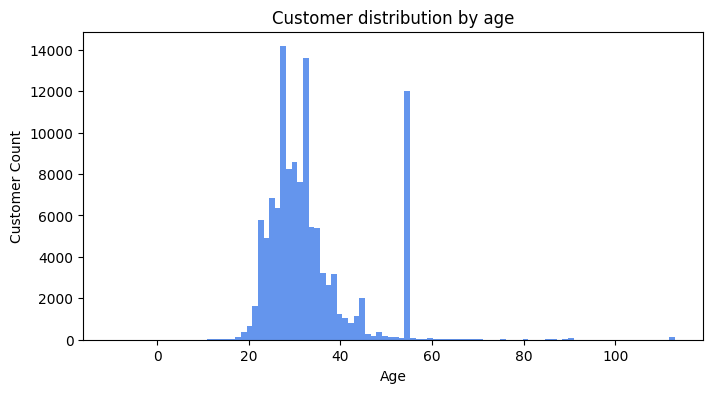

In [35]:
#Biểu đồ phân bổ lượng khách hàng theo độ tuổi
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins= 100, color = 'cornflowerblue', grid= False)
plt.title('Customer distribution by age')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.show()

<Axes: >

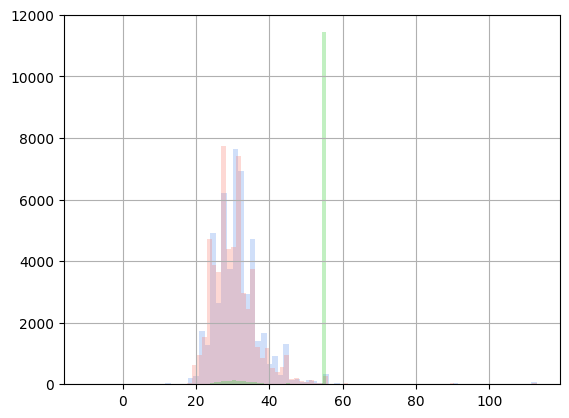

In [36]:
#Phân bổ lượng khách hàng theo giới tính
df_cus[df_cus['usergender'] == 'Male']['age'].hist(bins= 80, alpha = 0.3, color = 'cornflowerblue', label= 'Male')
df_cus[df_cus['usergender'] == 'Female']['age'].hist(bins= 80, alpha = 0.3, color = 'salmon', label= 'Female')
df_cus[df_cus['usergender'] == 'Not verify']['age'].hist(bins= 80, alpha = 0.3, color = 'limegreen', label= 'Not verify')

([<matplotlib.patches.Wedge at 0x21d751bb800>,
 [Text(-1.0937700247811786, 0.1169065134634527, 'Female'),
  Text(0.9923627447221103, -0.47456947108679465, 'Male'),
  Text(0.36641474570829957, 1.0371789788303283, 'Not verify')],
 [Text(-0.5966018316988245, 0.06376718916188329, '46.6%'),
  Text(0.5412887698484237, -0.2588560751382516, '42.6%'),
  Text(0.19986258856816339, 0.5657339884529062, '10.8%')])

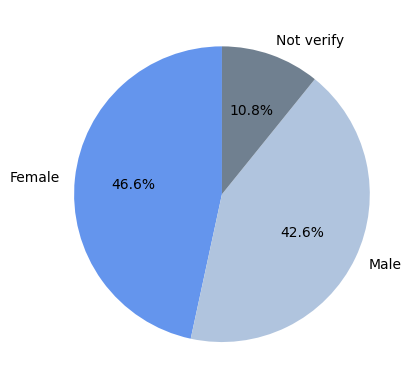

In [37]:
#Tỷ trọng khách hàng theo giới tính
df_gen = df_cus.groupby('usergender').agg(Total = ('customer_id', 'count')).reset_index()
plt.pie(df_gen['Total'],labels = df_gen['usergender'], colors= ['cornflowerblue','lightsteelblue','slategrey'], autopct= '%1.1f%%', startangle= 90)

In [38]:
#Kiểm tra thông tin nhóm Not Verify
df_not_verify = df_cus[df_cus['usergender'] == 'Not verify']
df_not_verify_age = df_not_verify.groupby('age')['customer_id'].count().sort_values(ascending = False)
print(df_not_verify_age)

df_cus[df_cus['age']== 55].count()
df_not_verify.count()
11927/14563


age
55    11435
30      126
29      116
31      113
27      113
28      110
32      109
33      103
26       90
35       89
25       79
34       76
36       58
45       46
24       36
37       32
38       28
41       22
39       15
42       14
23       10
40       10
22        7
47        6
46        5
50        5
44        5
43        4
21        4
12        3
48        3
65        3
18        3
52        3
59        2
69        2
64        2
63        2
62        2
71        2
60        2
90        2
58        2
54        2
53        2
20        2
57        1
61        1
51        1
49        1
66        1
67        1
17        1
73        1
74        1
11        1
Name: customer_id, dtype: int64


0.818993339284488

18% off users remain unverified, falling into 2 cases:
- Usser who provide their date of birth, resulting in vilid data.
- Users who did not provide a date of birth, who are by default assinged the year of birth 1970 (age 55). This group accounts for 82% of all unverified users 

### Age generation distribution

In [39]:
#Phân bổ khách hàng theo nhóm thế hệ

#Loại bỏ các khách hàng chưa được xác thực
df_cus = df_cus[df_cus['usergender'] != 'Not verify']
specific_cols(df_cus,['usergender'])


df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'Baby boomers' if x.year< 1965 else 'Gen X' if x.year< 1981 else 'Gen Y' if x.year< 1997 else 'Gen Z')
specific_cols(df_cus,['age_generation'])

df_generation = df_cus.groupby('age_generation').agg(Total = ('customer_id', 'count')).reset_index()
df_generation


----------------------------------------------------------------------------------------------------
*, Column: usergender
usergender
Female    55689
Male      50873
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column: age_generation
age_generation
Gen Y           63310
Gen Z           38401
Gen X            4261
Baby boomers      590
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


C:\Users\hueok\AppData\Local\Temp\ipykernel_22356\1956751624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'Baby boomers' if x.year< 1965 else 'Gen X' if x.year< 1981 else 'Gen Y' if x.year< 1997 else 'Gen Z')


,age_generation,Total
0,Baby boomers,590
1,Gen X,4261
2,Gen Y,63310
3,Gen Z,38401


([<matplotlib.patches.Wedge at 0x21d752550a0>,
 [Text(-0.01913243777787231, 1.0998336009709269, 'Baby boomers'),
  Text(-0.17569316491234355, 1.0858784056251807, 'Gen X'),
  Text(-0.9190847340394431, -0.6043866739560414, 'Gen Y'),
  Text(0.995843146279652, 0.4672220328792768, 'Gen Z')],
 [Text(-0.010435875151566715, 0.5999092368932328, '0.6%'),
  Text(-0.09583263540673283, 0.5922973121591893, '4.0%'),
  Text(-0.5013189458396962, -0.32966545852147705, '59.4%'),
  Text(0.5431871706979919, 0.2548483815705146, '36.0%')])

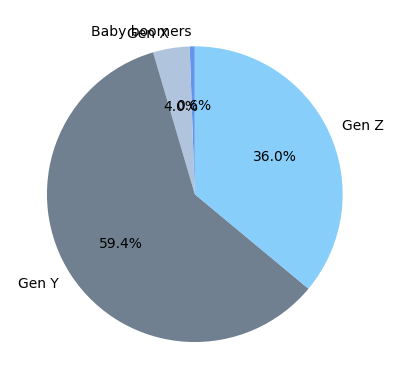

In [40]:
plt.pie(df_generation['Total'],labels = df_generation['age_generation'], colors= ['cornflowerblue','lightsteelblue','slategrey','lightskyblue'], autopct= '%1.1f%%', startangle= 90)

Text(0.5, 1.0, 'Customer distribution by genaration')

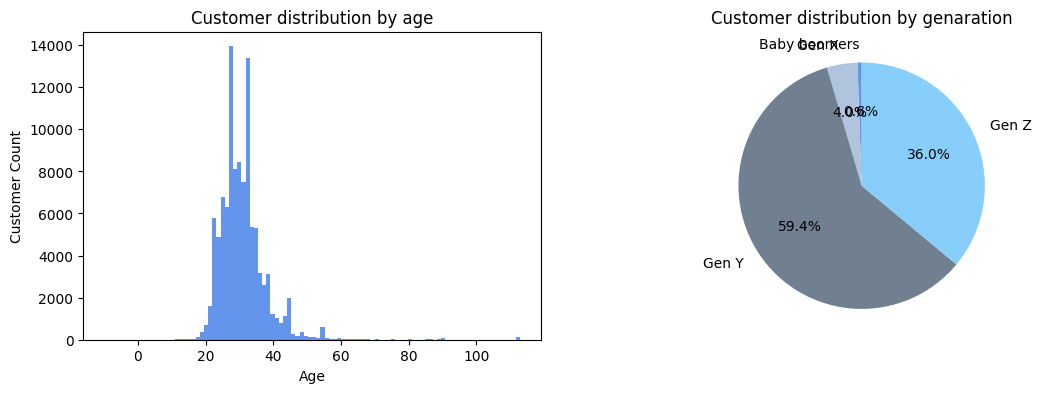

In [41]:
plt.figure(figsize= (13,4))

ax1 = plt.subplot(1,2,1)
df_cus[df_cus['usergender'] != 'Not verify']['age'].hist(bins= 100, color = 'cornflowerblue', grid= False)
plt.title('Customer distribution by age')
plt.xlabel('Age')
plt.ylabel('Customer Count')

ax1 = plt.subplot(1,2,2)
explode = [0.1 if val < 10 else 0 for val in df_generation['Total']]
plt.pie(df_generation['Total'],labels = df_generation['age_generation'], colors= ['cornflowerblue','lightsteelblue','slategrey','lightskyblue'], autopct= '%1.1f%%', startangle= 90,labeldistance=1.15, explode=explode)
plt.title('Customer distribution by genaration')

## 3.2. Time series data - When did customers buy tickets?

In [42]:
join_all['month'] = pd.to_datetime(join_all['time']).dt.month
join_all['name_day'] = pd.to_datetime(join_all['time']).dt.day_name()
join_all['hour'] = pd.to_datetime(join_all['time']).dt.hour
join_all['month_year'] = join_all['time'].dt.strftime('%Y-%m')
join_all

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,model,platform,campaign_type,description,error_group,age,month,name_day,hour,month_year
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,"iPhone13,1",mobile,direct discount,Order successful,unknown,36,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,browser,website,direct discount,Order successful,unknown,34,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,mobile,unknown,Order successful,unknown,36,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,devicemodel,mobile,direct discount,Order successful,unknown,28,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,devicemodel,mobile,direct discount,Order successful,unknown,37,7,Sunday,18,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154720,6d81d62a2d26adb4c9b47d254a2bfe27,194726,debit card,70.0,f5ad6683cca252327b19bef18f0e8a65,5.16,2.31,2.85,2022-10-22 13:01:58.840,-5,97120,Black Adam,Male,2001-01-21,devicemodel,mobile,direct discount,Payment failed from bank,external,24,10,Saturday,13,2022-10
154721,740855b0fdc18125b773f904279d2dfb,211166,money in app,101.0,217e197a017719ed96da9c140968a15f,5.07,0.00,5.07,2022-10-23 10:51:32.185,1,0,Black Adam,Male,1995-05-05,devicemodel,mobile,unknown,Order successful,unknown,30,10,Sunday,10,2022-10
154722,9a65bf4e0ab9da0186007404f6ec0960,211671,money in app,176.0,627e3c4a56079dff9fd3a6f0f77ae13c,14.72,2.31,12.41,2022-10-23 11:11:23.037,1,97120,Black Adam,Male,1980-05-19,devicemodel,mobile,direct discount,Order successful,unknown,45,10,Sunday,11,2022-10
154723,e47b196dbb5b487b3f6cf1cabe242552,223500,bank account,176.0,f6836889dc1bbc02547e23a1c59a8bb2,13.36,4.78,8.58,2022-10-22 20:35:02.732,1,97150,Black Adam,Not verify,1970-01-01,browser,website,direct discount,Order successful,unknown,55,10,Saturday,20,2022-10


### Trend by month

In [43]:
df_month_year = join_all.groupby('month_year').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_month_year.head()

,month_year,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-05'),
  Text(16, 0, '2020-06'),
  Text(17, 0, '2020-07'),
  Text(18, 0, '2020-08'),
  Text(19, 0, '2020-09'),
  Text(20, 0, '2020-10'),
  Text(21, 0, '2020-11'),
  Text(22, 0, '2020-12'),
  Text(23, 0, '2021-01'),
  Text(24, 0, '2021-02'),
  Text(25, 0, '2021-03'),
  Text(26, 0, '2021-04'),
  Text(27, 0, '2021-05'),
  Text(28, 0, '2021-0

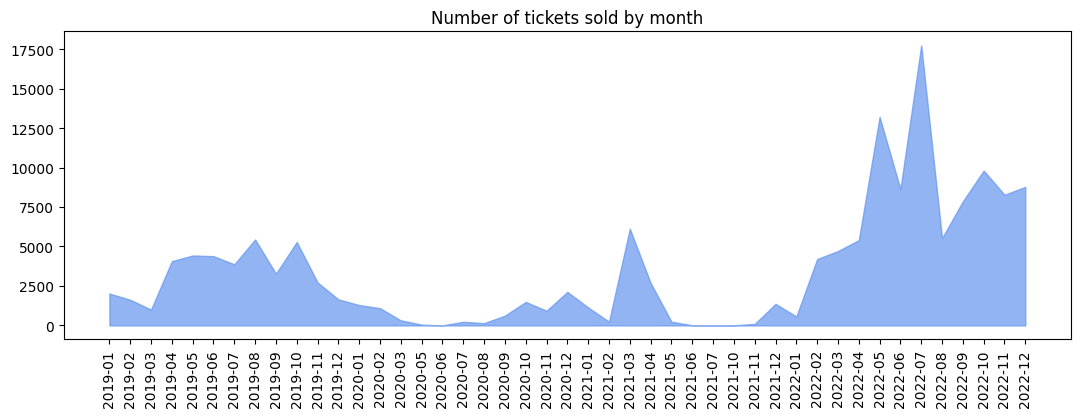

In [44]:
plt.figure(figsize= (13,4))
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number of tickets sold by month')
plt.xticks(rotation= 90)

_Note: the data does note contain a complete time series (missing April 2020 and Agust - September 2021) -> create a full time series._

In [45]:
start_date = '2019-01-01'
end_date = '2022-12-31'

data_range = pd.date_range(start_date, end_date, freq= 'MS')
month_range = data_range.month
month_name = data_range.strftime('%B')
year_range = data_range.year
month_year = data_range.strftime('%Y-%m')
month_year

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype='object')

In [46]:
dim_time = pd.DataFrame({'month_number' : month_range,
            'month_name' : month_name,
            'year' : year_range,
            'month_year' : month_year})
dim_time.head()

,month_number,month_name,year,month_year
0,1,January,2019,2019-01
1,2,February,2019,2019-02
2,3,March,2019,2019-03
3,4,April,2019,2019-04
4,5,May,2019,2019-05


In [47]:
join_all = pd.merge(dim_time, join_all, how= 'left', on= 'month_year')
join_all['customer_id']= join_all['customer_id'].fillna(0).astype(int)
join_all

,month_number,month_name,year,month_year,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,model,platform,campaign_type,description,error_group,age,month,name_day,hour
0,1,January,2019,2019-01,8a7f2cab8756e57def04ada487e988fd,100464,bank account,160.0,12fb2c927e118974e5760da6d23774f0,8.25,0.82,7.43,2019-01-03 18:39:23.087,1.0,14560.0,Aquaman,Male,1988-05-17,HUAWEI ANE-LX2,mobile,voucher,Order successful,unknown,37.0,1.0,Thursday,18.0
1,1,January,2019,2019-01,c7ea0f76d90e2a53108b257d3a9f7b99,107065,money in app,92.0,5ab191f6212c82c12447b7b3e1d89275,10.31,9.49,0.82,2019-01-03 19:00:36.653,1.0,13740.0,Aquaman,Female,1994-05-24,"iPhone5,2",mobile,reward point,Order successful,unknown,31.0,1.0,Thursday,19.0
2,1,January,2019,2019-01,379c51d5915607e94a375f9d9bdab650,107210,credit card,92.0,9ef86913f4326010ebb63e2df8f144a9,12.78,2.06,10.72,2019-01-01 18:34:10.308,1.0,14180.0,Aquaman,Male,1988-11-06,"iPhone10,5",mobile,voucher,Order successful,unknown,36.0,1.0,Tuesday,18.0
3,1,January,2019,2019-01,c72ee7e76b5c6c02a389481c35e1ee36,115091,bank account,125.0,129d52f9d9c21ef98f498af31f8ea690,10.31,0.00,10.31,2019-01-03 14:41:20.073,1.0,0.0,Aquaman,Female,1993-09-04,OPPO A1601,mobile,unknown,Order successful,unknown,32.0,1.0,Thursday,14.0
4,1,January,2019,2019-01,1ffcca5b242a94833488457c9c23dc66,128429,bank account,121.0,715ad91099e6e77f8c121ad77849a87c,8.25,0.00,8.25,2019-01-02 00:40:25.769,-2.0,0.0,Aquaman,Male,1995-06-26,"iPhone9,1",mobile,unknown,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer,30.0,1.0,Wednesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154723,12,December,2022,2022-12,cfa46dbde92afb880a4861027277168e,186572,money in app,7.0,bc61f7523bb2e4a2e3c865f95fd98ed8,5.57,5.53,0.04,2022-12-04 07:23:21.223,1.0,99080.0,Nct Dream The Movie : In A Dream,Female,2000-12-06,browser,website,direct discount,Order successful,unknown,24.0,12.0,Sunday,7.0
154724,12,December,2022,2022-12,b55ad1c647b78aac0e858dc17d089ac0,194575,money in app,148.0,2804f4c13616bf97dad9c13b97333e5a,5.16,2.31,2.85,2022-12-03 16:21:15.472,1.0,97120.0,Nct Dream The Movie : In A Dream,Female,1996-09-04,"iPhone12,1",mobile,direct discount,Order successful,unknown,29.0,12.0,Saturday,16.0
154725,12,December,2022,2022-12,243c710cad00e45b30bc0fb1596bc606,214308,money in app,9.0,47fc57f51e36aa9b7862eb2a6b4f5fa5,11.55,0.00,11.55,2022-12-01 10:45:40.260,1.0,0.0,Nct Dream The Movie : In A Dream,Female,2002-07-14,"iPhone8,1",mobile,unknown,Order successful,unknown,23.0,12.0,Thursday,10.0
154726,12,December,2022,2022-12,6b99d136ec4d651404df1ba7298d771f,214523,money in app,5.0,f37dc8a3a5cca1ca439fb469248c308b,5.16,2.31,2.85,2022-12-04 11:24:30.430,1.0,97120.0,Nct Dream The Movie : In A Dream,Female,2000-09-08,browser,website,direct discount,Order successful,unknown,25.0,12.0,Sunday,11.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-05'),
  Text(17, 0, '2020-06'),
  Text(18, 0, '2020-07'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-09'),
  Text(21, 0, '2020-10'),
  Text(22, 0, '2020-11'),
  Text(23, 0, '2020-12'),
  Text(24, 0, '2021-01'),
  Text(25, 0, '2021-02'),
  Text(26, 0, '2021-03'),
  Text(27, 0, '2021-04'),
  T

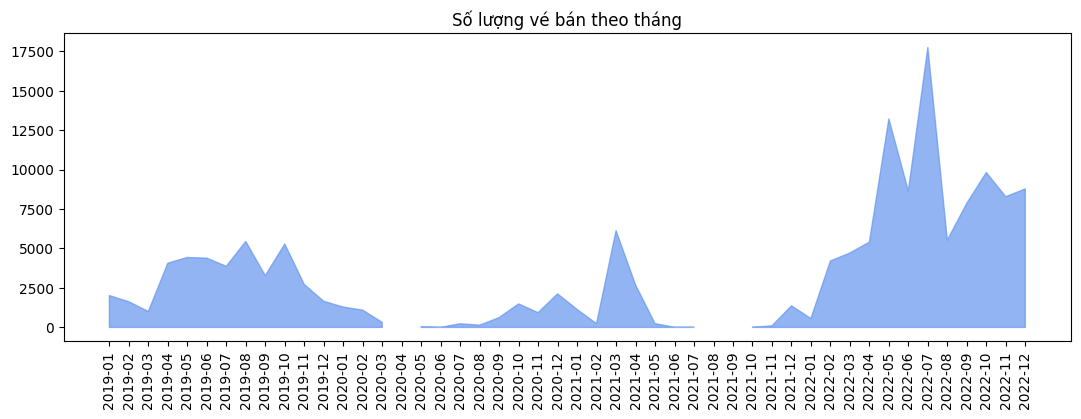

In [48]:
df_month_year = join_all.groupby('month_year').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_month_year

#Thay thế các giá trị 0 thành NA
df_month_year.replace(0, np.nan, inplace = True) 

plt.figure(figsize= (13,4))
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán theo tháng')
plt.xticks(rotation= 90)

### Trend by week days

In [49]:
df_week_day = join_all.groupby('name_day').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_week_day

#Xác định thứ tự order
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_week_day['name_day'] = pd.Categorical(df_week_day['name_day'], categories = week_order, ordered = True)
df_week_day.sort_values('name_day', inplace = True)
df_week_day

,name_day,total_ticket
1,Monday,16702
5,Tuesday,14793
6,Wednesday,16281
4,Thursday,19101
0,Friday,26438
2,Saturday,34450
3,Sunday,26960


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

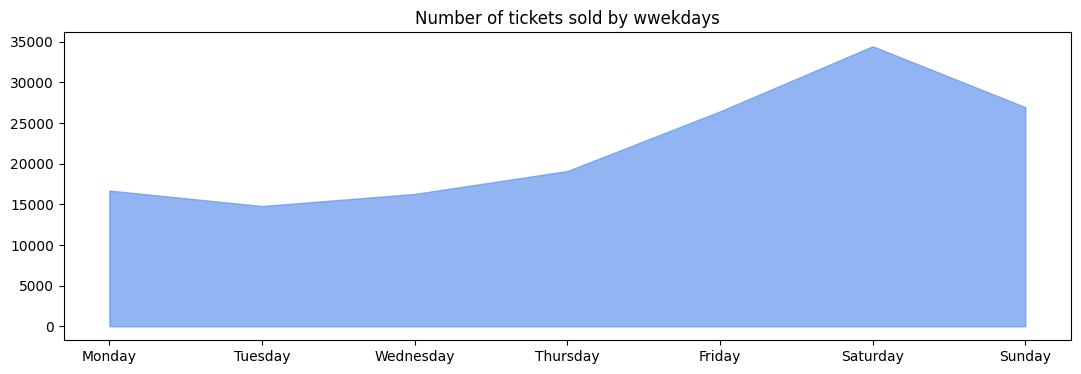

In [50]:
plt.figure(figsize= (13,4))
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number of tickets sold by wwekdays')
plt.xticks(rotation= 0)

### Trend by hours

In [51]:
df_hour = join_all.groupby('hour').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_hour

,hour,total_ticket
0,0.0,2352
1,1.0,964
2,2.0,398
3,3.0,159
4,4.0,74
5,5.0,146
6,6.0,536
7,7.0,1473
8,8.0,3865
9,9.0,7111


([<matplotlib.axis.XTick at 0x21d0014bb90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

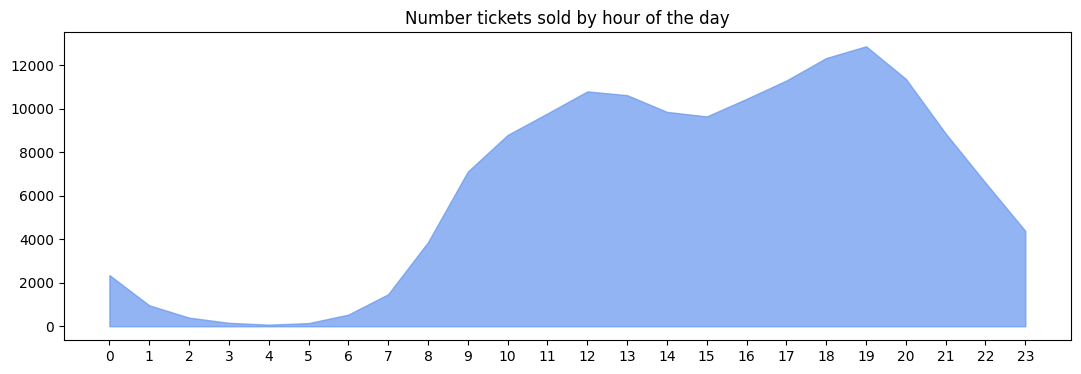

In [52]:
plt.figure(figsize= (13,4))
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number tickets sold by hour of the day')
plt.xticks(rotation= 0)
xvalue = [i for i in range(24)]
plt.xticks(xvalue)

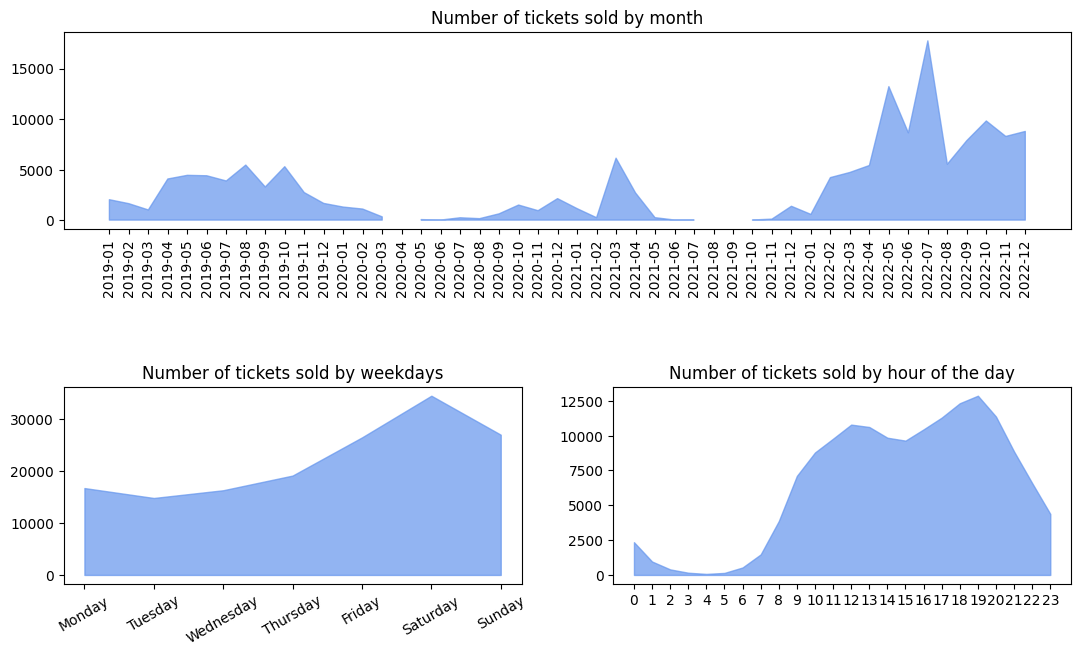

In [53]:
plt.figure(figsize= (13,8))

ax1 = plt.subplot(2,1,1)
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number of tickets sold by month')
plt.xticks(rotation= 90)

ax2 = plt.subplot(2,2,3)
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number of tickets sold by weekdays')
plt.xticks(rotation= 30)

ax3 = plt.subplot(2,2,4)
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Number of tickets sold by hour of the day')
plt.xticks(rotation= 0)
xvalue = [i for i in range(24)]
plt.xticks(xvalue)

plt.subplots_adjust(hspace= 0.8, top= 0.8)

- In general, after the end of Covid 19, movie ticket transactions increased sharply compared to the period before the pandemic.
- Customer transactions peaked from Thursday to Sunday, with most activity taking place between 9 a.m to and 10 p.m

## 3.3 Factors related to the customer's purchasing process

### Payment platform

In [54]:
#Vẽ biểu đồ thể hiện tổng lượng vé được đặt theo platform
df_platform = join_all[join_all['platform']!= 'unknown'].groupby('platform').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, 'Share of ticket across platforms')

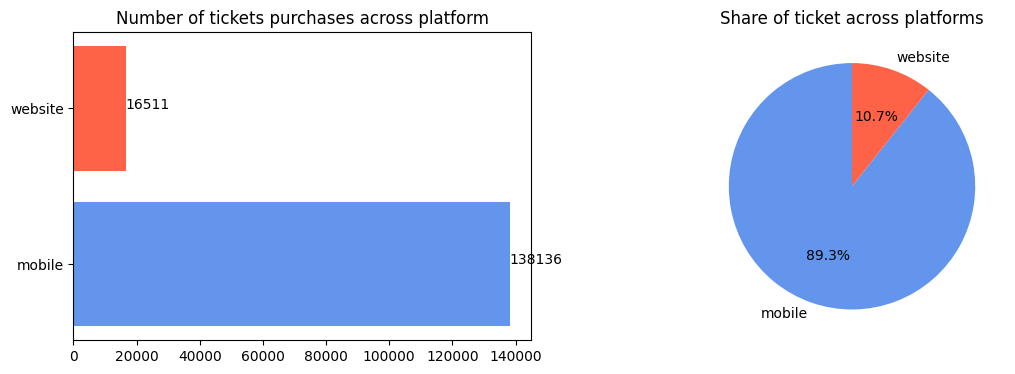

In [55]:
plt.figure(figsize= (13,4))

ax1= plt.subplot(1,2,1)
plt.barh(df_platform['platform'], df_platform['total_ticket'], color= ['cornflowerblue','tomato'])
plt.title('Number of tickets purchases across platform')
for index, value in enumerate (df_platform['total_ticket']):
    plt.text(value,index,str(value))

ax1= plt.subplot(1,2,2)
plt.pie(df_platform['total_ticket'], labels= df_platform['platform'],colors= ['cornflowerblue','tomato'], autopct= '%1.1f%%', startangle= 90)
plt.title('Share of ticket across platforms')

In [56]:
df_platform_time = join_all[join_all['platform']!= 'unknown'].groupby(['month_year','platform']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_platform_time

,month_year,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430
...,...,...,...
66,2022-10,website,1849
67,2022-11,mobile,6677
68,2022-11,website,1603
69,2022-12,mobile,6959


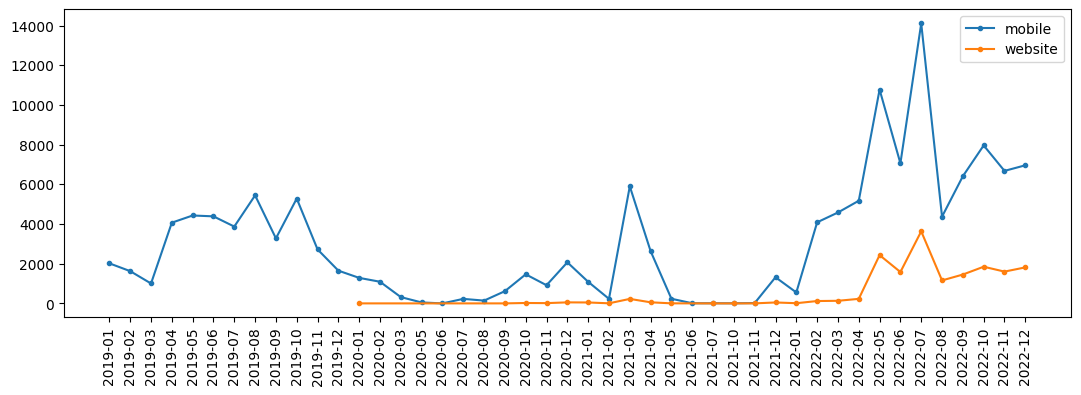

In [57]:
plt.figure(figsize=(13,4))

df_mobile_line = df_platform_time[df_platform_time['platform']== 'mobile'] 
plt.plot(df_mobile_line['month_year'],df_mobile_line['total_ticket'], label = 'mobile', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_website_line = df_platform_time[df_platform_time['platform']== 'website'] 
plt.plot(df_website_line['month_year'],df_website_line['total_ticket'], label = 'website', marker= 'o', markersize= 3)

plt.xticks(rotation= 90)
plt.legend()

- Payments made on devices accounted for 89.3% in total tickets sales.
- Customers prefer purchasing tickets through mobile apps rather than on the website.

### OS Version

In [58]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154728 entries, 0 to 154727
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   month_number    154728 non-null  int32         
 1   month_name      154728 non-null  object        
 2   year            154728 non-null  int32         
 3   month_year      154728 non-null  object        
 4   ticket_id       154725 non-null  object        
 5   customer_id     154728 non-null  int32         
 6   paying_method   154725 non-null  object        
 7   theater_name    154725 non-null  float64       
 8   device_number   154725 non-null  object        
 9   original_price  154725 non-null  float64       
 10  discount_value  154725 non-null  float64       
 11  final_price     154725 non-null  float64       
 12  time            154725 non-null  datetime64[ns]
 13  status_id       154725 non-null  float64       
 14  campaign_id     154725 non-null  flo

In [59]:
join_all['os_version'] = join_all['model'].astype(str).apply(lambda x: 'IOS' if ('iPhone' in x or 'iPod' in x or 'iPad' in x)
                                                    else 'browser' if 'browser' in x
                                                    else 'unknown' if ('devicemodel' in x or'unknown' in x)
                                                    else 'android & other')
df_os = join_all.groupby(['os_version']).agg(total_ticket= ('ticket_id', 'count')).sort_values(by= 'total_ticket').reset_index()
df_os

,os_version,total_ticket
0,browser,13377
1,android & other,20934
2,IOS,51560
3,unknown,68854


Text(0.5, 1.0, 'Share of ticket bookings by device')

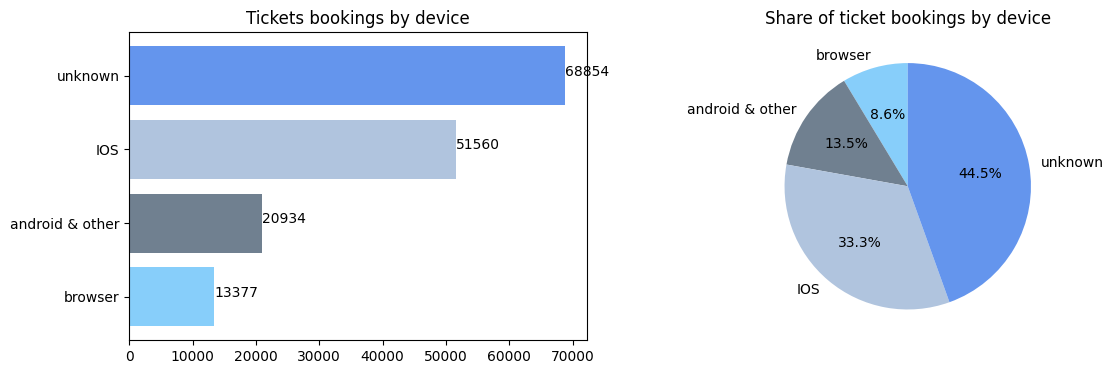

In [60]:
plt.figure(figsize= (13,4))

ax1= plt.subplot(1,2,1)
plt.barh(df_os['os_version'], df_os['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Tickets bookings by device')
for index, value in enumerate (df_os['total_ticket']):
    plt.text(value,index,str(value))

ax2= plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Share of ticket bookings by device')

os_version month_year     IOS  android & other  browser  unknown
0             2019-01  1243.0            703.0      NaN     73.0
1             2019-02  1079.0            537.0      NaN     10.0
2             2019-03   636.0            366.0      NaN      2.0
3             2019-04  2556.0           1504.0      NaN      9.0
4             2019-05  2849.0           1578.0      NaN      3.0
5             2019-06  2814.0           1569.0      NaN      4.0
6             2019-07  2514.0           1358.0      NaN      NaN
7             2019-08  3657.0           1782.0      NaN      5.0
8             2019-09  2162.0           1111.0      NaN      5.0
9             2019-10  3325.0           1952.0      NaN      7.0
10            2019-11  1783.0            939.0      NaN      NaN
11            2019-12  1185.0            465.0      NaN      1.0
12            2020-01   901.0            386.0      NaN      2.0
13            2020-02   791.0            301.0      NaN      NaN
14            2020-03   2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-05'),
  Text(17, 0, '2020-06'),
  Text(18, 0, '2020-07'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-09'),
  Text(21, 0, '2020-10'),
  Text(22, 0, '2020-11'),
  Text(23, 0, '2020-12'),
  Text(24, 0, '2021-01'),
  Text(25, 0, '2021-02'),
  Text(26, 0, '2021-03'),
  Text(27, 0, '2021-04'),
  T

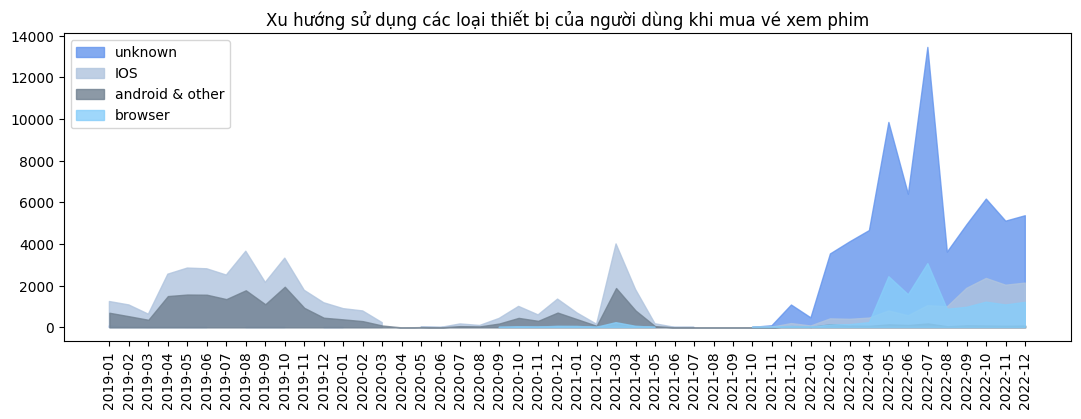

In [61]:
df_os_time = join_all.pivot_table(index= 'month_year', columns ='os_version', aggfunc= 'count', values= 'ticket_id').reset_index()
print(df_os_time)

plt.figure(figsize= (13,4))
plt.fill_between(df_os_time['month_year'],df_os_time['unknown'], color= 'cornflowerblue', alpha= 0.8, label= 'unknown')
plt.fill_between(df_os_time['month_year'],df_os_time['IOS'], color= 'lightsteelblue', alpha= 0.8, label= 'IOS')
plt.fill_between(df_os_time['month_year'],df_os_time['android & other'], color= 'slategrey', alpha= 0.8, label= 'android & other')
plt.fill_between(df_os_time['month_year'],df_os_time['browser'], color= 'lightskyblue', alpha= 0.8, label= 'browser')
plt.legend(loc= "upper left")
plt.title('Xu hướng sử dụng các loại thiết bị của người dùng khi mua vé xem phim')
plt.xticks(rotation = 90)


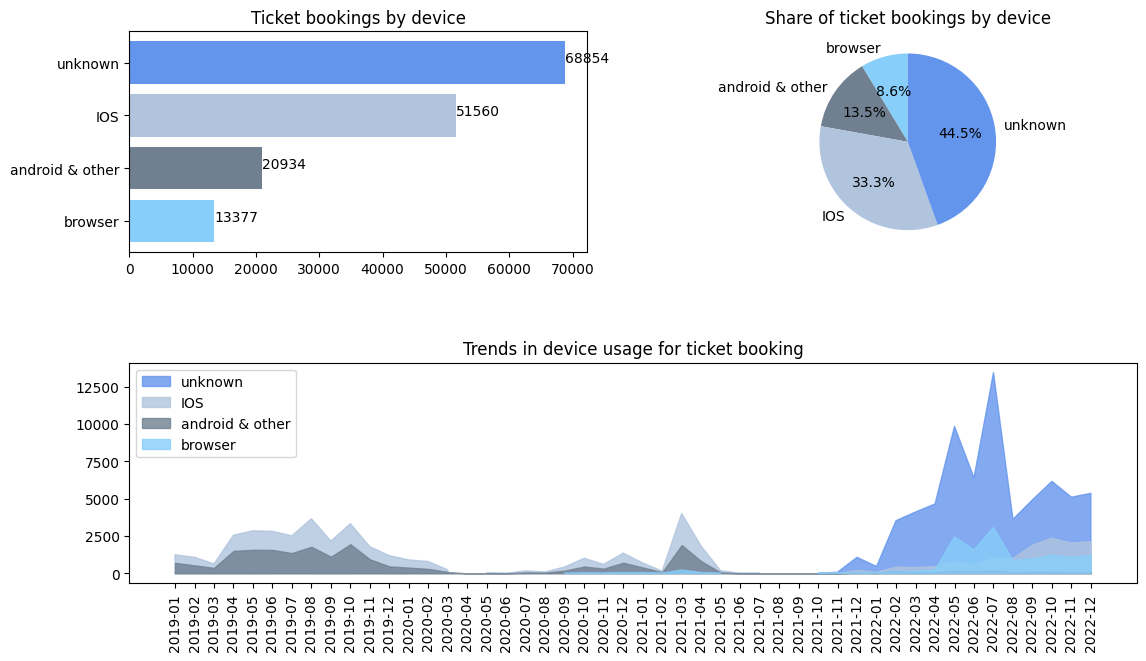

In [62]:
plt.figure(figsize= (13,8))

ax1= plt.subplot(2,2,1)
plt.barh(df_os['os_version'], df_os['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Ticket bookings by device')
for index, value in enumerate (df_os['total_ticket']):
    plt.text(value,index,str(value))

ax2= plt.subplot(2,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Share of ticket bookings by device')

ax3= plt.subplot(2,1,2)
plt.fill_between(df_os_time['month_year'],df_os_time['unknown'], color= 'cornflowerblue', alpha= 0.8, label= 'unknown')
plt.fill_between(df_os_time['month_year'],df_os_time['IOS'], color= 'lightsteelblue', alpha= 0.8, label= 'IOS')
plt.fill_between(df_os_time['month_year'],df_os_time['android & other'], color= 'slategrey', alpha= 0.8, label= 'android & other')
plt.fill_between(df_os_time['month_year'],df_os_time['browser'], color= 'lightskyblue', alpha= 0.8, label= 'browser')
plt.legend(loc= "upper left")
plt.title('Trends in device usage for ticket booking')
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace= 0.5, top= 0.8)

A large number of transactions with unidentified devices have appeared since aroung November 2021 - what is the cause?

### Payment Method

In [63]:
df_payment= join_all[join_all['paying_method'] != 'other'].groupby(['paying_method']).agg(total_ticket= ('ticket_id', 'count')).reset_index().sort_values(by= 'total_ticket')
df_payment

,paying_method,total_ticket
2,debit card,15680
1,credit card,19820
0,bank account,52643
3,money in app,66580


In [64]:
df_payment_time= join_all[join_all['paying_method'] != 'other'].groupby(['month_year','paying_method']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_payment_time.fillna(0, inplace= True)

In [65]:
df_payment_pivot = df_payment_time.pivot_table(index= 'month_year', columns= 'paying_method', aggfunc= 'sum', values= 'total_ticket').reset_index()
df_payment_pivot['total'] = df_payment_pivot.iloc[:, 1:5].sum(axis=1)

for i in df_payment_pivot.columns[1:5]:
    df_payment_pivot[i+'_pct']= df_payment_pivot[i]/df_payment_pivot['total'] 

df_payment_pivot['pct'] = df_payment_pivot.iloc[:, 6:10].sum(axis=1)
df_payment_pivot.fillna(0, inplace= True)


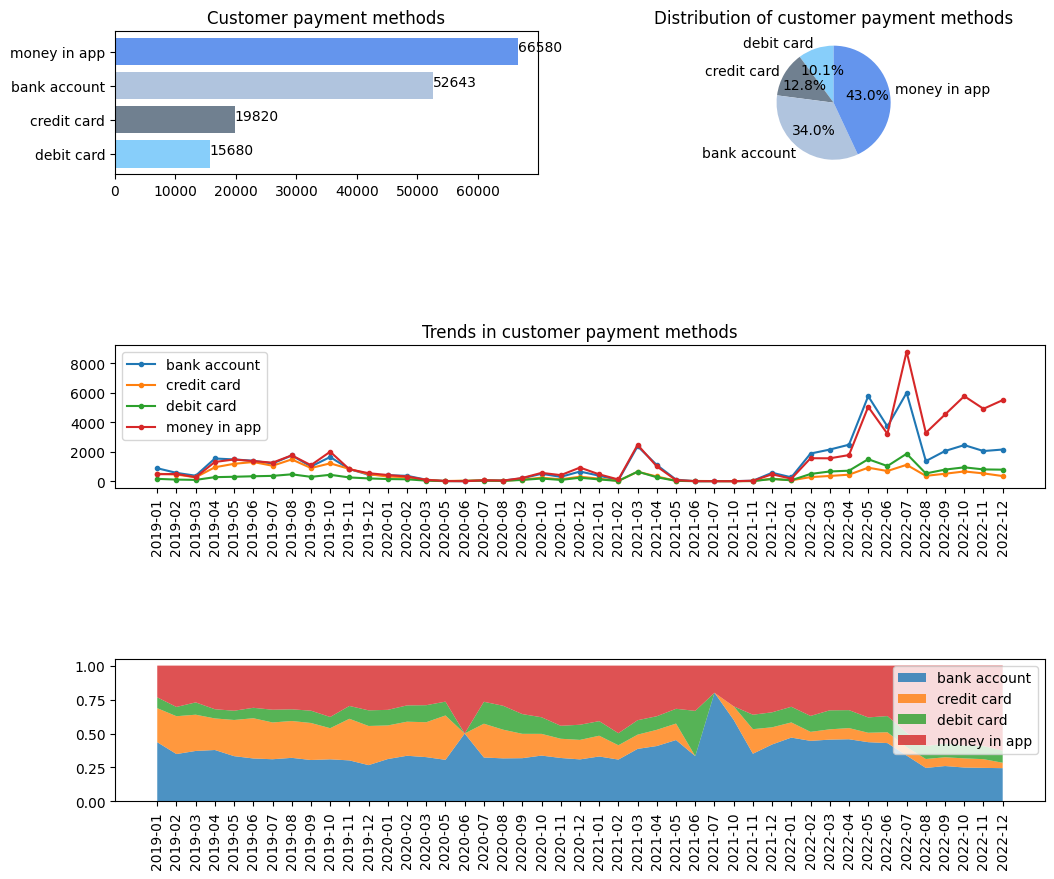

In [66]:
plt.figure(figsize= (12,10))

ax1= plt.subplot(3,2,1)
plt.barh(df_payment['paying_method'], df_payment['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Customer payment methods')
for index, value in enumerate (df_payment['total_ticket']):
    plt.text(value,index,str(value))


ax2= plt.subplot(3,2,2)
plt.pie(df_payment['total_ticket'], labels= df_payment['paying_method'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Distribution of customer payment methods')


ax3= plt.subplot(3,1,2)
df_bank_account_line = df_payment_time[df_payment_time['paying_method']== 'bank account'] 
plt.plot(df_bank_account_line['month_year'],df_bank_account_line['total_ticket'], label = 'bank account', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_credit_card_line = df_payment_time[df_payment_time['paying_method']== 'credit card'] 
plt.plot(df_credit_card_line['month_year'],df_credit_card_line['total_ticket'], label = 'credit card', marker= 'o', markersize= 3)

df_debit_card_line = df_payment_time[df_payment_time['paying_method']== 'debit card'] 
plt.plot(df_debit_card_line['month_year'],df_debit_card_line['total_ticket'], label = 'debit card', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_money_in_app_line = df_payment_time[df_payment_time['paying_method']== 'money in app'] 
plt.plot(df_money_in_app_line['month_year'],df_money_in_app_line['total_ticket'], label = 'money in app', marker= 'o', markersize= 3)

plt.title('Trends in customer payment methods')
plt.xticks(rotation= 90)
plt.legend()


ax4= plt.subplot(3,1,3)
plt.stackplot(df_payment_pivot['month_year'], df_payment_pivot['bank account_pct'],df_payment_pivot['credit card_pct'],df_payment_pivot['debit card_pct'],df_payment_pivot['money in app_pct'],
             labels= ['bank account','credit card','debit card', 'money in app'], alpha= 0.8)
plt.xticks(rotation= 90)
plt.legend()

plt.subplots_adjust(hspace= 1.2)


- Users tend to use money in app to pay for their tickets, with money in app and bank accounts being the most common payment methods.
- Meanwhile, payment by credit card is less preferred and tends to decline gradually.

### Promotion

In [67]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154728 entries, 0 to 154727
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   month_number    154728 non-null  int32         
 1   month_name      154728 non-null  object        
 2   year            154728 non-null  int32         
 3   month_year      154728 non-null  object        
 4   ticket_id       154725 non-null  object        
 5   customer_id     154728 non-null  int32         
 6   paying_method   154725 non-null  object        
 7   theater_name    154725 non-null  float64       
 8   device_number   154725 non-null  object        
 9   original_price  154725 non-null  float64       
 10  discount_value  154725 non-null  float64       
 11  final_price     154725 non-null  float64       
 12  time            154725 non-null  datetime64[ns]
 13  status_id       154725 non-null  float64       
 14  campaign_id     154725 non-null  flo

In [68]:
join_all['type'] = join_all['campaign_type'].apply(lambda x: 'non-promotion' if x == 'unknown' else 'promotion')
join_all

,month_number,month_name,year,month_year,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,model,platform,campaign_type,description,error_group,age,month,name_day,hour,os_version,type
0,1,January,2019,2019-01,8a7f2cab8756e57def04ada487e988fd,100464,bank account,160.0,12fb2c927e118974e5760da6d23774f0,8.25,0.82,7.43,2019-01-03 18:39:23.087,1.0,14560.0,Aquaman,Male,1988-05-17,HUAWEI ANE-LX2,mobile,voucher,Order successful,unknown,37.0,1.0,Thursday,18.0,android & other,promotion
1,1,January,2019,2019-01,c7ea0f76d90e2a53108b257d3a9f7b99,107065,money in app,92.0,5ab191f6212c82c12447b7b3e1d89275,10.31,9.49,0.82,2019-01-03 19:00:36.653,1.0,13740.0,Aquaman,Female,1994-05-24,"iPhone5,2",mobile,reward point,Order successful,unknown,31.0,1.0,Thursday,19.0,IOS,promotion
2,1,January,2019,2019-01,379c51d5915607e94a375f9d9bdab650,107210,credit card,92.0,9ef86913f4326010ebb63e2df8f144a9,12.78,2.06,10.72,2019-01-01 18:34:10.308,1.0,14180.0,Aquaman,Male,1988-11-06,"iPhone10,5",mobile,voucher,Order successful,unknown,36.0,1.0,Tuesday,18.0,IOS,promotion
3,1,January,2019,2019-01,c72ee7e76b5c6c02a389481c35e1ee36,115091,bank account,125.0,129d52f9d9c21ef98f498af31f8ea690,10.31,0.00,10.31,2019-01-03 14:41:20.073,1.0,0.0,Aquaman,Female,1993-09-04,OPPO A1601,mobile,unknown,Order successful,unknown,32.0,1.0,Thursday,14.0,android & other,non-promotion
4,1,January,2019,2019-01,1ffcca5b242a94833488457c9c23dc66,128429,bank account,121.0,715ad91099e6e77f8c121ad77849a87c,8.25,0.00,8.25,2019-01-02 00:40:25.769,-2.0,0.0,Aquaman,Male,1995-06-26,"iPhone9,1",mobile,unknown,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer,30.0,1.0,Wednesday,0.0,IOS,non-promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154723,12,December,2022,2022-12,cfa46dbde92afb880a4861027277168e,186572,money in app,7.0,bc61f7523bb2e4a2e3c865f95fd98ed8,5.57,5.53,0.04,2022-12-04 07:23:21.223,1.0,99080.0,Nct Dream The Movie : In A Dream,Female,2000-12-06,browser,website,direct discount,Order successful,unknown,24.0,12.0,Sunday,7.0,browser,promotion
154724,12,December,2022,2022-12,b55ad1c647b78aac0e858dc17d089ac0,194575,money in app,148.0,2804f4c13616bf97dad9c13b97333e5a,5.16,2.31,2.85,2022-12-03 16:21:15.472,1.0,97120.0,Nct Dream The Movie : In A Dream,Female,1996-09-04,"iPhone12,1",mobile,direct discount,Order successful,unknown,29.0,12.0,Saturday,16.0,IOS,promotion
154725,12,December,2022,2022-12,243c710cad00e45b30bc0fb1596bc606,214308,money in app,9.0,47fc57f51e36aa9b7862eb2a6b4f5fa5,11.55,0.00,11.55,2022-12-01 10:45:40.260,1.0,0.0,Nct Dream The Movie : In A Dream,Female,2002-07-14,"iPhone8,1",mobile,unknown,Order successful,unknown,23.0,12.0,Thursday,10.0,IOS,non-promotion
154726,12,December,2022,2022-12,6b99d136ec4d651404df1ba7298d771f,214523,money in app,5.0,f37dc8a3a5cca1ca439fb469248c308b,5.16,2.31,2.85,2022-12-04 11:24:30.430,1.0,97120.0,Nct Dream The Movie : In A Dream,Female,2000-09-08,browser,website,direct discount,Order successful,unknown,25.0,12.0,Sunday,11.0,browser,promotion


Text(0.5, 1.0, 'Promotional Trend')

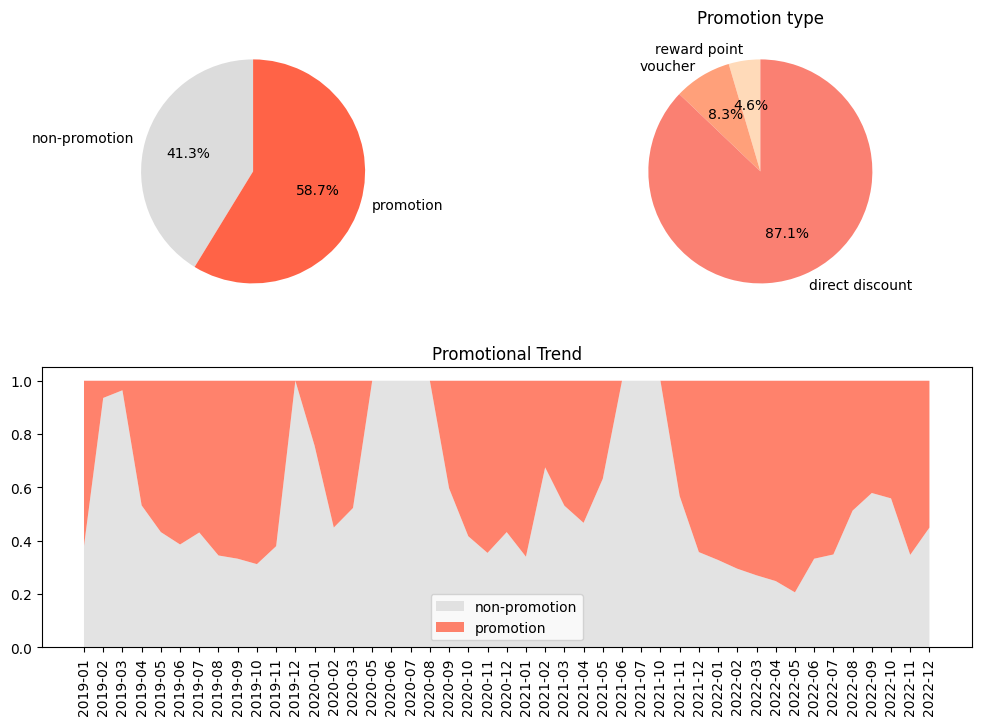

In [69]:
plt.figure(figsize= (12,8))

#Pivot tạo biểu đồ tròn
ax1= plt.subplot(2,2,1)

df_pro_pie = join_all[(join_all['status_id'] == 1) & (join_all['paying_method'] != 'other')].groupby(['type']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
plt.pie(df_pro_pie['total_ticket'], labels= df_pro_pie['type'], autopct= '%1.1f%%', startangle= 90, colors= ['gainsboro','tomato'])

ax2= plt.subplot(2,2,2)
df_pro_by_type = join_all[join_all['campaign_type']!= 'unknown'].groupby(['campaign_type']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_pro_by_type = df_pro_by_type.sort_values(by= 'total_ticket')
plt.pie(df_pro_by_type['total_ticket'], labels= df_pro_by_type['campaign_type'], autopct= '%1.1f%%', startangle= 90, colors= ['peachpuff','lightsalmon','salmon','darksalmon'])
plt.title('Promotion type')

#Pivot tạo biểu dồ miền
ax3= plt.subplot(2,1,2)
df_pro = join_all[(join_all['status_id'] == 1) & (join_all['paying_method'] != 'other')].groupby(['month_year', 'type']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_pro_pivot= df_pro.pivot(index= 'month_year', columns= 'type', values= 'total_ticket').reset_index()

df_pro_pivot['total'] = df_pro_pivot.iloc[:, 1:3].sum(axis=1)

for i in df_pro_pivot.columns[1:3]:
    df_pro_pivot[i+'_pct']= df_pro_pivot[i]/df_pro_pivot['total'] 

df_pro_pivot['pct'] = df_pro_pivot.iloc[:, 4:6].sum(axis=1)
df_pro_pivot.fillna(0, inplace= True)
plt.stackplot(df_pro_pivot['month_year'], df_pro_pivot['non-promotion_pct'], df_pro_pivot['promotion_pct'],
             labels= ['non-promotion','promotion'], alpha= 0.8, colors= ['gainsboro','tomato'])
plt.xticks(rotation= 90)
plt.legend()
plt.title('Promotional Trend')

Nearly 60% of tickets purchased with promotions. The proportion of tickets using promotions increased significantly in 2022, with direct discounts being the most preferred program, accounting for 87.1% of all tickets purchased with promotions. 

### Which movies they watch?

In [70]:
movies = join_all[join_all['status_id']== 1].groupby(['movie_name']).agg(total_ticket= ('ticket_id','count'), total_customer= ('customer_id', 'nunique') ,revenue= ('final_price', 'sum')).reset_index().sort_values(by= 'revenue', ascending= False)
list_film= movies[movies['total_ticket']>1500]['movie_name'].unique()
list_film

array(['Doctor Strange In The Multiverse Of Madness',
       'Avatar: The Way Of Water', 'Minions: The Rise Of Gru',
       'Thor: Love And Thunder', 'Peninsula',
       'Black Panther 2: Wakanda Forever', 'Avengers: Endgame',
       "Dad I'm Sorry", 'Black Adam', 'You And Trinh', 'Love Destiny',
       'Jurassic World Dominion', 'Emergency Declaration',
       'Fast & Furious Presents: Hobbs & Shaw', 'Godzilla Vs. Kong',
       'Detective Conan: The Bride Of Halloween'], dtype=object)

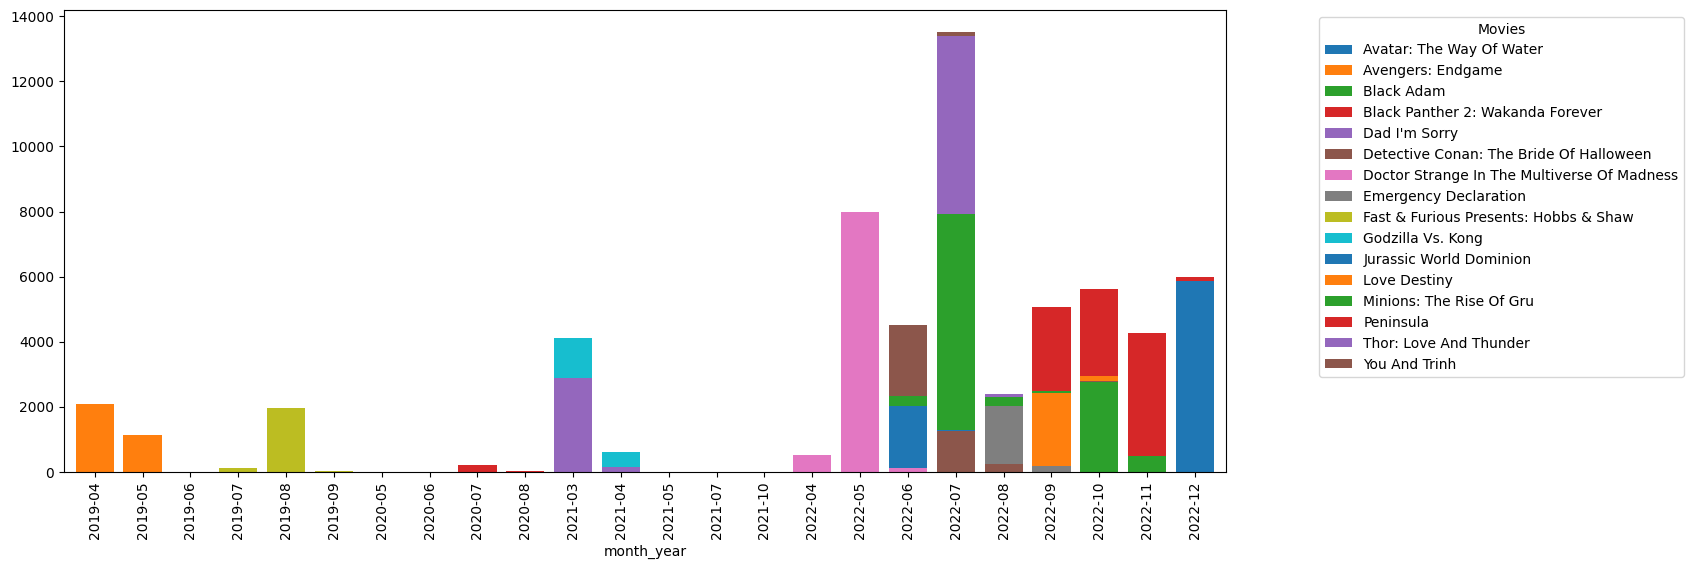

In [71]:
top_movie = join_all[(join_all['movie_name'].isin(list_film)) & (join_all['status_id']== 1)]
top_movie = top_movie.pivot_table(index= 'month_year', columns= 'movie_name', values= 'ticket_id', aggfunc = 'count').reset_index()

#plt.figure(figsize= (12,8))
ax= top_movie.plot(x= 'month_year', kind = 'bar', stacked= True, figsize= (15,6), width= 0.8)
plt.legend(title= 'Movies', loc= 'upper right', bbox_to_anchor=(1.4,1), )


## 3.4 Customer value dimension

Analyzing customer behavior:
- When do they usually watch movies?
- Total payments and applied discounts.
- Transaction success rate.
- Promotion usage rate in transactions
- Discount rate relative to total payment

In [72]:
def calculate_n_promotion(x):
    return(x== 'promotion').sum()

df_customer_success = (
    join_all[join_all['status_id']== 1]
    .assign(date= pd.to_datetime(join_all['time']).dt.date)
    .groupby(['customer_id'])
    .agg( n_success = ('ticket_id','count'),
          s_money = ('original_price', 'sum'),
          s_money_after_promo = ('final_price', 'sum'),
          s_discount = ('discount_value', 'sum'),
          n_promo = ('type', calculate_n_promotion),
          n_date = ('date', 'nunique'),
          n_month = ('month', 'nunique')
    )
             ). reset_index()
df_customer_success

,customer_id,n_success,s_money,s_money_after_promo,s_discount,n_promo,n_date,n_month
0,100001,1,7.42,5.36,2.06,1,1,1
1,100003,6,60.95,58.39,2.56,1,6,6
2,100004,1,32.25,32.25,0.00,0,1,1
3,100005,1,9.49,7.43,2.06,1,1,1
4,100006,1,12.37,12.37,0.00,0,1,1
...,...,...,...,...,...,...,...,...
105771,231393,1,14.39,12.74,1.65,1,1,1
105772,231395,1,5.16,3.26,1.90,1,1,1
105773,231397,1,10.72,9.07,1.65,1,1,1
105774,231398,1,11.92,10.68,1.24,1,1,1


In [73]:
def calculate_n_satus_failed(x):
    return(x!= 1).sum()

df_customer_total = (join_all[join_all['customer_id'] != 0]
    .groupby(['customer_id'])
    .agg( n_total_ticket = ('ticket_id','count'),
          n_failed = ('status_id', calculate_n_satus_failed)
    )
             ). reset_index()
df_customer_total

,customer_id,n_total_ticket,n_failed
0,100001,1,0
1,100003,6,0
2,100004,1,0
3,100005,1,0
4,100006,1,0
...,...,...,...
119472,231393,1,0
119473,231395,1,0
119474,231397,1,0
119475,231398,1,0


In [74]:
df_customer= pd.merge(df_customer_total, df_customer_success, how= 'left', on= 'customer_id')

df_customer['success_rate']= df_customer['n_success']/df_customer['n_total_ticket']
df_customer['díscount_rate']= df_customer['s_discount']/df_customer['s_money']
df_customer['promotion_rate']= df_customer['n_promo']/df_customer['n_success']
df_customer

,customer_id,n_total_ticket,n_failed,n_success,s_money,s_money_after_promo,s_discount,n_promo,n_date,n_month,success_rate,díscount_rate,promotion_rate
0,100001,1,0,1.0,7.42,5.36,2.06,1.0,1.0,1.0,1.0,0.277628,1.000000
1,100003,6,0,6.0,60.95,58.39,2.56,1.0,6.0,6.0,1.0,0.042002,0.166667
2,100004,1,0,1.0,32.25,32.25,0.00,0.0,1.0,1.0,1.0,0.000000,0.000000
3,100005,1,0,1.0,9.49,7.43,2.06,1.0,1.0,1.0,1.0,0.217071,1.000000
4,100006,1,0,1.0,12.37,12.37,0.00,0.0,1.0,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119472,231393,1,0,1.0,14.39,12.74,1.65,1.0,1.0,1.0,1.0,0.114663,1.000000
119473,231395,1,0,1.0,5.16,3.26,1.90,1.0,1.0,1.0,1.0,0.368217,1.000000
119474,231397,1,0,1.0,10.72,9.07,1.65,1.0,1.0,1.0,1.0,0.153918,1.000000
119475,231398,1,0,1.0,11.92,10.68,1.24,1.0,1.0,1.0,1.0,0.104027,1.000000


array([[<Axes: title={'center': 'n_total_ticket'}>,
        <Axes: title={'center': 'n_failed'}>,
        <Axes: title={'center': 'n_success'}>],
       [<Axes: title={'center': 's_money'}>,
        <Axes: title={'center': 's_money_after_promo'}>,
        <Axes: title={'center': 's_discount'}>],
       [<Axes: title={'center': 'n_promo'}>,
        <Axes: title={'center': 'n_date'}>,
        <Axes: title={'center': 'n_month'}>],
       [<Axes: title={'center': 'success_rate'}>,
        <Axes: title={'center': 'díscount_rate'}>,
        <Axes: title={'center': 'promotion_rate'}>]], dtype=object)

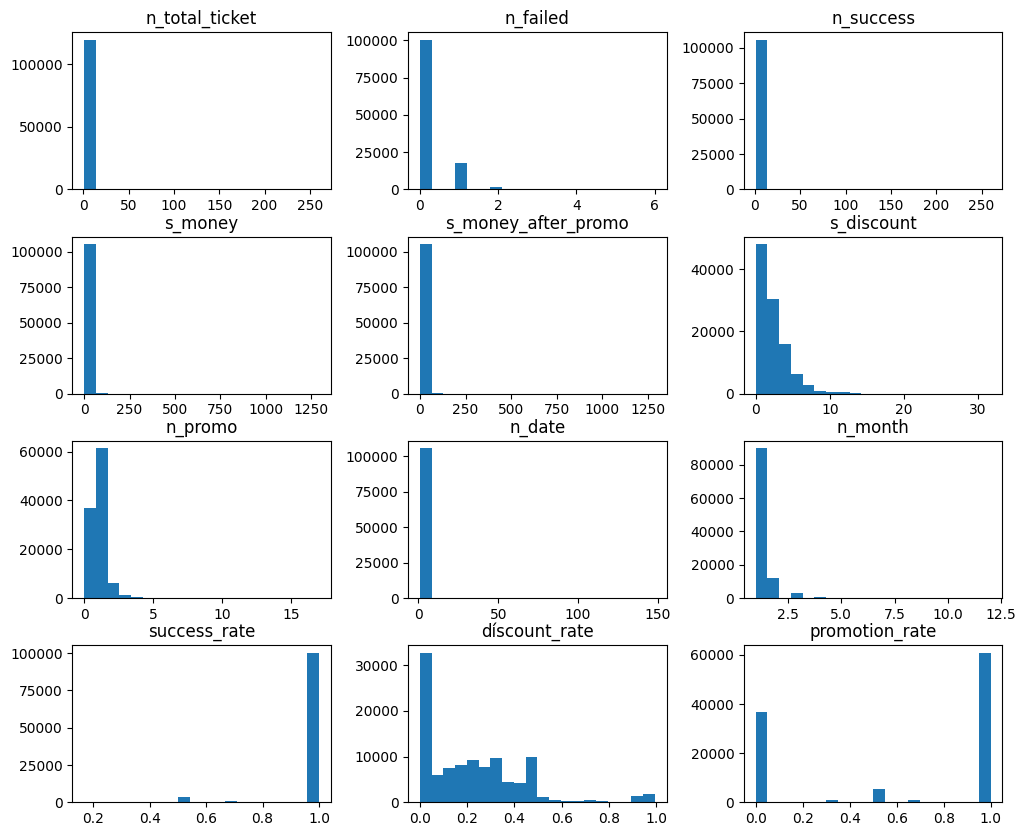

In [75]:
df_customer.iloc[:,1:].hist(figsize=(12,10), grid= False, bins= 20)

- Over 10% of payment transactions have failed.
- A few cases recorded an unusually large number of tickets, requiring further review.

- Around 60,000 customers (50%) used the promotion only once.
- Another 60,000 customers applied promotions in 100% of their transactions.
Initial Hypothesis: The promotion was limited to new customer only, so those users redeemed it for first purchase and did not return afterward.

### Review of transactions from customers purchasing large volume of tisckets

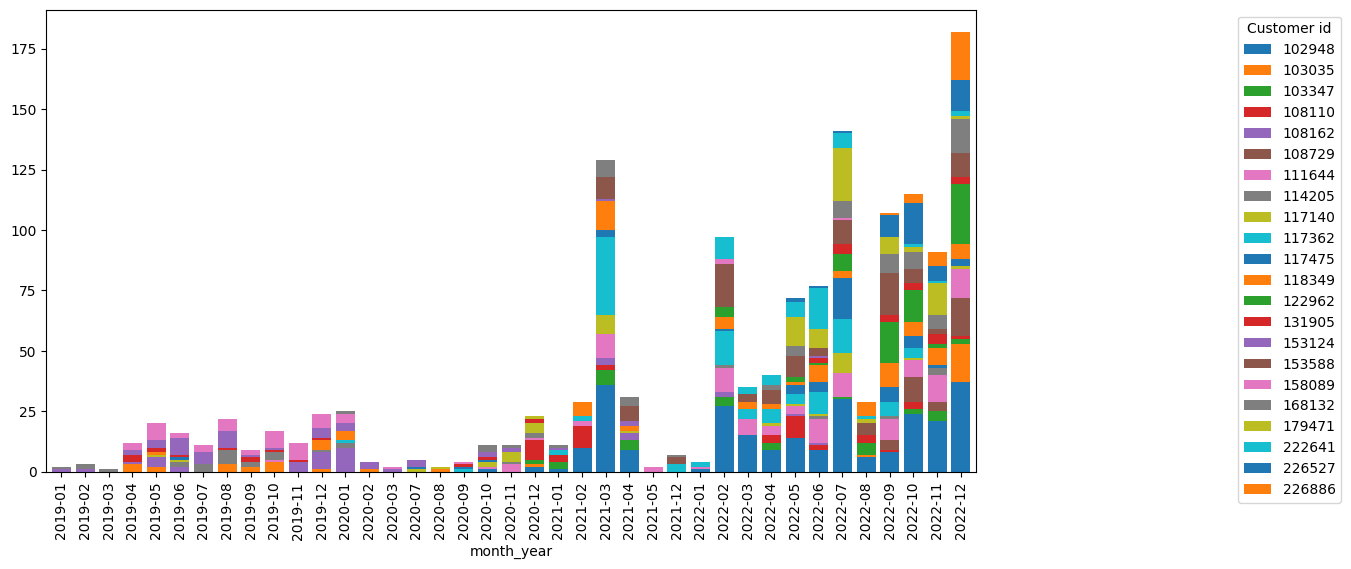

In [110]:
checking_id_users= df_customer[df_customer['n_total_ticket']> 30].sort_values(by= 'n_total_ticket', ascending = False)
checking_id_users= checking_id_users['customer_id'].unique()
check_users= join_all[(join_all['customer_id'].isin(checking_id_users)) & (join_all['status_id']== 1)]
tickets_by_users = check_users.pivot_table(index= 'month_year', columns= 'customer_id', values= 'ticket_id', aggfunc = 'count').reset_index()
tickets_by_users

ax= tickets_by_users.plot(x= 'month_year', kind = 'bar', stacked= True, figsize= (12,6), width= 0.8)
plt.legend(title= 'Customer id', loc= 'upper right', bbox_to_anchor=(1.4,1), )




The group of customers purchasing more than 30 tickets shows a disperesed allocation of tickets, with no signal of ticket hoarding. No irregularities have been detected.